<a href="https://colab.research.google.com/github/srimanthtenneti/Deep_Learning_Workshop_Sept2021/blob/main/Day4Lab_Image_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning
### Introduction
IEEE (Institute of Electrical and Electronics Engineering) is the world's largest organisation which is dedicated for the benifit of technological development. IEEE has highly cited publications, conferences, technology standards, and professional and educational activities. 
Technolites is a club of CVRCoE which is devoted for various technical events. Here students get highly inspired and share their ideas to derive some exceptionally innovative projects and technical event.
For the first time in collaboration with IEEE CVECoE and Technolites CVRCoE we are presenting to you a 6-days workshop on Deep Learning.

### About the Notebook

* Author : Srimanth Tenneti
* Date   : 22/09/2021
* Version : 1.0
* Description : Day-4 Hands on Lab Notebook
* Topic : Image Processing Basics
* Prerequisites  
                  1. Python
                  2. Image Reprasentation

### Instructions

* The notebook contains some Fixme segments. The code will only work if they are filled with the appropriate code.

* Follow the instructions during the Live Session to complete the code. 

* In case you face any issues kindly contact the Training Assistants in the live session or contact the IEEE CVRCE members via the Discord Community.


### Importing required libraires

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Exercise Happy Face

In [6]:
#### Todo : Implement a Happy Face Image using numpy arrays
img = Fixme
plt.imshow(img)

### Getting the datasets for the rest of the session

In [1]:
!git clone https://github.com/srimanthtenneti/Images

Cloning into 'Images'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 143 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (143/143), 6.70 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (4/4), done.


### Understanding Color Spaces
#### RGB

Text(0.5, 1.0, 'My Favourite Car :)')

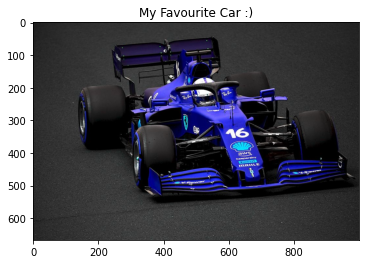

In [12]:
img = Fixme ### Read the image using opencv
plt.imshow(img)
plt.title("My Favourite Car :)")

### But why is the ferrari in blue color ? 🥶🥶🥶

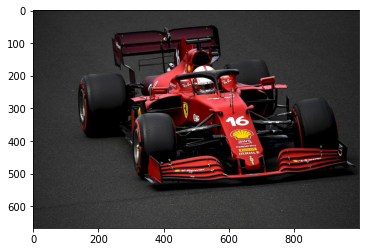

In [10]:
img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
### Now this is the ferrari I know

### Visualizing the individual dimensions

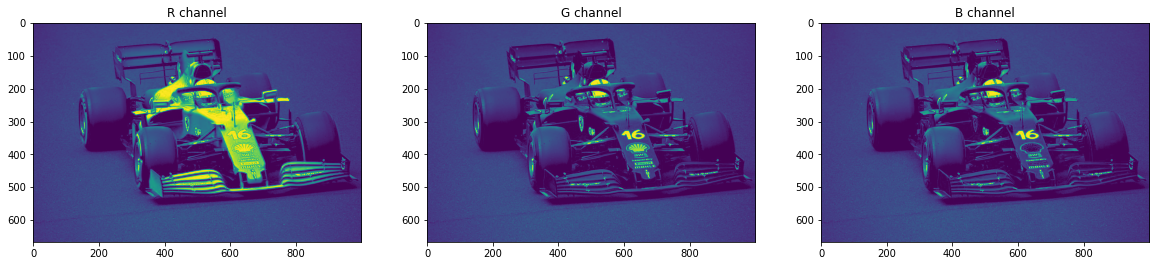

In [13]:
r = Fixme # Sample the R channels
g = Fixme # Sample the G channels
b = Fixme # Sample the B channels

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
print("Pay attention to the shaded portions")
ax1.set_title('R channel')
ax1.imshow(r)
ax2.set_title('G channel')
ax2.imshow(g)
ax3.set_title('B channel')
ax3.imshow(b)

### Project : Day and Night Classifier using HSV Transforms

In [6]:
import os

day = []
night = []

# BGR -> RGB && Image Resizing

for dirname, _, filenames in os.walk('/content/Images/DaynNight/Day'):
    for filename in filenames:
        image = cv2.imread(os.path.join(dirname, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (100,100))
        day.append(image)

for dirname, _, filenames in os.walk('/content/Images/DaynNight/Night'):
    for filename in filenames:
        image = cv2.imread(os.path.join(dirname, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (100,100))
        night.append(image)

### Looking at some data samples

(100, 100, 3)


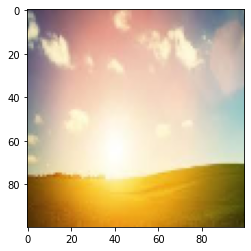

In [7]:
plt.imshow(day[0])
print(day[0].shape)

(100, 100, 3)


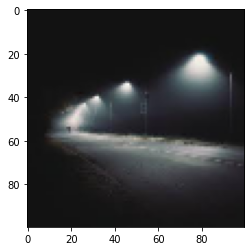

In [8]:
plt.imshow(night[0])
print(night[0].shape)

In [10]:
day_hsv = []
night_hsv = []

for i in range(len(day)):
  img = cv2.cvtColor(day[i] , cv2.COLOR_RGB2HSV)
  day_hsv.append(img)

for i in range(len(night)):
  img = cv2.cvtColor(night[i] , cv2.COLOR_RGB2HSV)
  night_hsv.append(img)

### Looking at HSV Samples

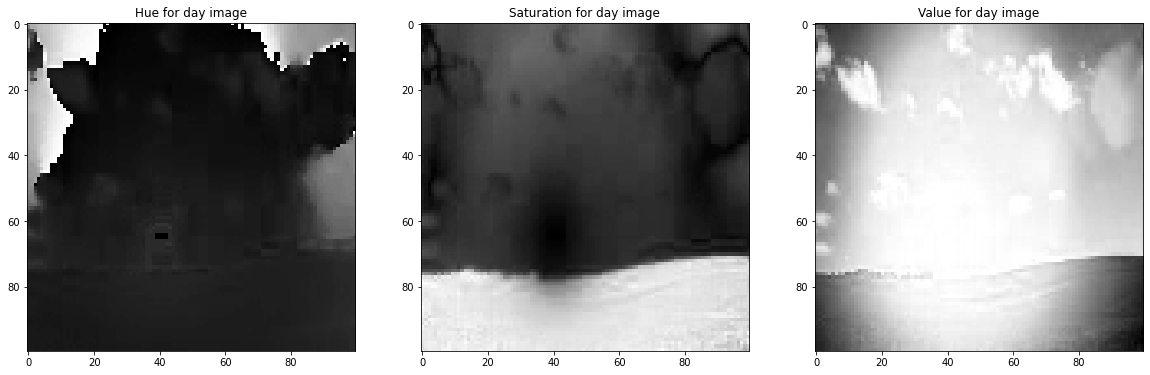

In [36]:
h_day = day_hsv[0][:,:,0]
s_day = day_hsv[0][:,:,1]
v_day = day_hsv[0][:,:,2]

f , (ax1 , ax2 , ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title("Hue for day image")
ax1.imshow(h_day , cmap = 'gray')

ax2.set_title("Saturation for day image")
ax2.imshow(s_day , cmap = 'gray')

ax3.set_title("Value for day image")
ax3.imshow(v_day , cmap = 'gray')

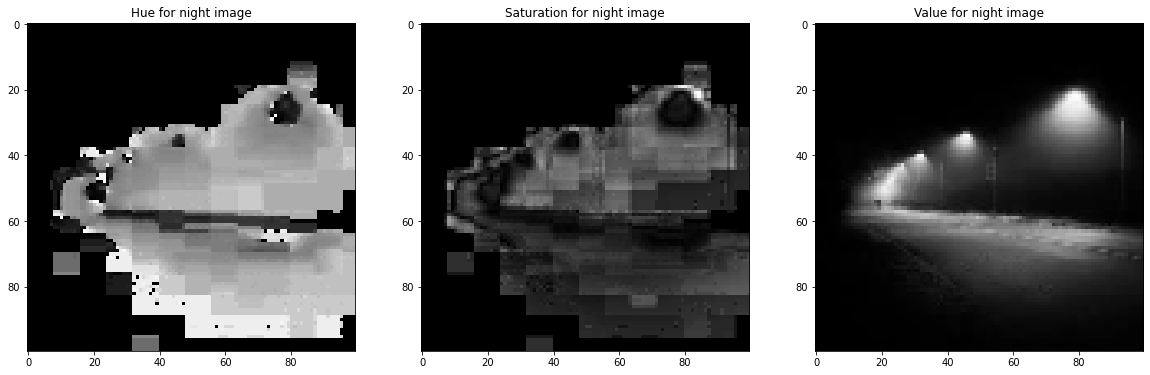

In [35]:
h_day = Fixme
s_day = Fixme
v_day = Fixme

f , (ax1 , ax2 , ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title("Hue for night image")
ax1.imshow(h_day , cmap = 'gray')

ax2.set_title("Saturation for night image")
ax2.imshow(s_day , cmap = 'gray')

ax3.set_title("Value for night image")
ax3.imshow(v_day , cmap = 'gray')

### Defining the predicting algorithm

In [25]:
def daynnight_predictor_score(image):
  image = Fixme ### Implement Color space transformations -> To HSV
  value = Fixme ### Find out the net Value 
  area = Fixme ### Calculate the area of the image
  return np.argmax(Fixme) # We will discuss in detail about argmax later

### Testing the model

In [39]:
daynnight_predictor_score(day_hsv[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


136

In [40]:
daynnight_predictor_score(night_hsv[0])

1

In [41]:
days_score = []
nights_score = []

for i in range(len(day)):
  days_score.append(daynnight_predictor_score(day_hsv[i]))

for i in range(len(night)):
  nights_score.append(daynnight_predictor_score(night_hsv[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Average Day intensity :  75.02564102564102


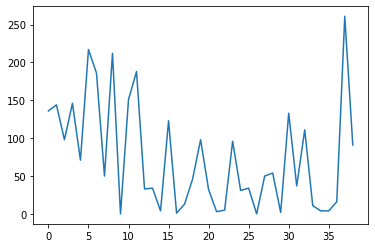

In [47]:
plt.plot(days_score)
print("Average Day intensity : ",np.mean(np.array(days_score)))

Average Day intensity :  55.63235294117647


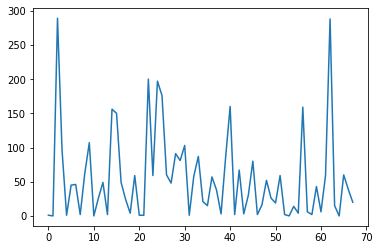

In [48]:
plt.plot(nights_score)
print("Average Night intensity : ",np.mean(np.array(nights_score)))

### Predicting the Accuracy

In [61]:
def daynnight(score):
  count = 0
  total = len(score)
  for i in range(len(score)):
    if score[i] > Fixme : # Define the threshold
        count += 1
    else :
        continue
  return ((count/total)*100)

In [62]:
print("Model Accuracy is {on day images} : ",daynnight(days_score))
print("Model Accuracy is {on night images} : ",daynnight(nights_score))

Model Accuracy is {on day images} :  41.02564102564102
Model Accuracy is {on night images} :  19.11764705882353
